# Signal Creation Pipeline

In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from modules.signals import plot_realization, get_sentiment_score, compute_key_metrics
from modules.data_utils import load_reddit_data, load_bitcoin_data
from modules.data_cleaning import preprocess_data
from modules.sentiment_analysis import get_roberta_checkpoint
from modules.btc_price_data_processing import add_performance_metrics
from modules.utils import set_pandas_display_options
set_pandas_display_options()


## Load and clean data

In [3]:
df = load_reddit_data()

## Sentiment Analysis

In [4]:
# get checkpoint
sentiment_roberta = get_roberta_checkpoint()

# merge sentiment
df = pd.merge(df, sentiment_roberta, how="left", on="submission")

## Relevance filtering

In [5]:
# LDA filter
topic_keywords = pd.read_csv("topic_keywords.csv")
trading_keywords = topic_keywords.loc[topic_keywords["Topic"]=="Topic 2", "Keyword"].values

com_filter = (df["num_comments"] > 100)
lda_filter = df["selftext"].str.lower().str.contains("|".join(trading_keywords))
print(df.shape)
df_lda = df.loc[lda_filter].copy() # filter on LDA topics
print(df_lda.shape)

(15582, 28)
(11048, 28)


## Sentiment Signal

In [51]:
lag = "1h"

df = get_sentiment_score(df, lag, True, True)
df_lda = get_sentiment_score(df_lda, lag, True, False)

# Price prediction

/users/eleves-b/2020/thibaud.gloaguen/4A/crypto-nlp/modules/btc_price_data_processing.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfh = btc_df.groupby(pd.Grouper(key="datetime", freq=freq))["open"].first().to_frame().copy()


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative Realized Performance'}, xlabel='Date', ylabel='Cumulative Performance'>)

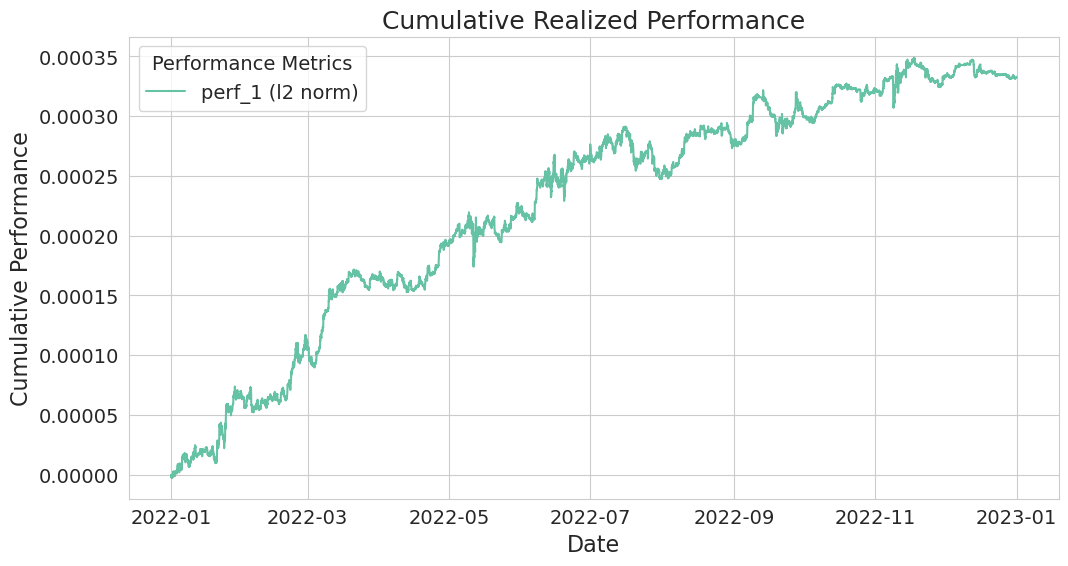

In [52]:
plot_df = df_lda.copy()

plot_df = add_performance_metrics(plot_df, [1])


perfs = [c for c in plot_df.columns if "perf" in c]
plot_realization(plot_df, "alpha", perfs, "l2", threshold=0.9)

In [55]:
from modules.signals import plot_realization, get_sentiment_score, compute_key_metrics

compute_key_metrics(plot_df, "alpha", perfs)

{'sharpe': [2.7334619819470847],
 'bias': [-0.0001917852541314407],
 'beta': [-0.00022225284182712598]}